In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


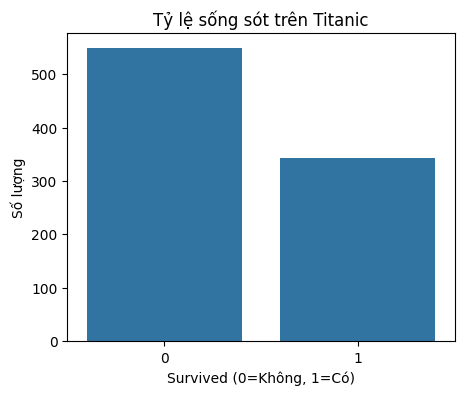

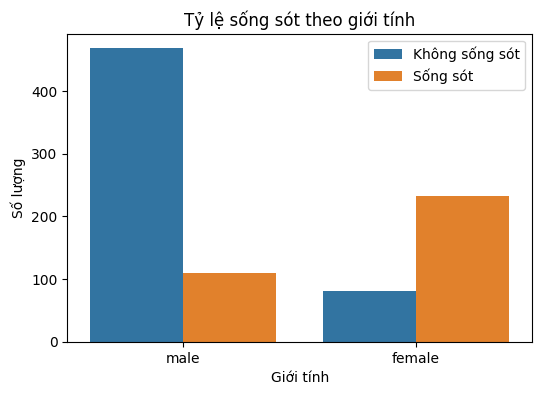

In [3]:
# Biểu đồ tỷ lệ sống sót
plt.figure(figsize=(5,4))
sns.countplot(x='Survived', data=df)
plt.title('Tỷ lệ sống sót trên Titanic')
plt.xlabel('Survived (0=Không, 1=Có)')
plt.ylabel('Số lượng')
plt.show()

# Biểu đồ sống sót theo giới tính
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Tỷ lệ sống sót theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.legend(['Không sống sót','Sống sót'])
plt.show()

In [4]:
# Xử lý dữ liệu thiếu
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch']
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,errors="ignore")
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0
887,1,1,female,19.0,0,0,30.0000,S,0
888,0,3,female,28.0,1,2,23.4500,S,3
889,1,1,male,26.0,0,0,30.0000,C,0


In [6]:
# Mã hóa categorical features
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,0
887,1,1,0,19.0,0,0,30.0000,2,0
888,0,3,0,28.0,1,2,23.4500,2,3
889,1,1,1,26.0,0,0,30.0000,0,0


In [7]:
# Chia dataset
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# Random Forest & XGBoost

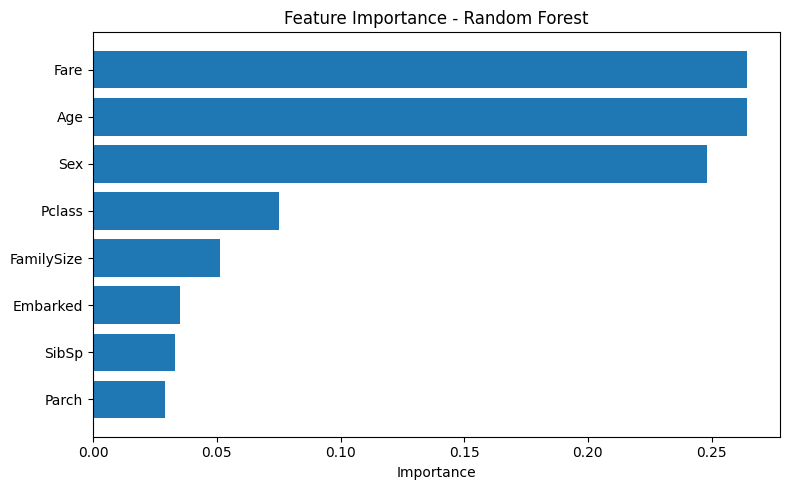

In [8]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
# Vẽ feature importance
importances = rf.feature_importances_
indices = importances.argsort()

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()



In [11]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
# So sánh metrics
metrics = {
    'Accuracy': [accuracy_score(y_test, rf_pred), accuracy_score(y_test, xgb_pred)],
    'Precision': [precision_score(y_test, rf_pred), precision_score(y_test, xgb_pred)],
    'Recall': [recall_score(y_test, rf_pred), recall_score(y_test, xgb_pred)],
    'F1': [f1_score(y_test, rf_pred), f1_score(y_test, xgb_pred)]
}

<Figure size 800x500 with 0 Axes>

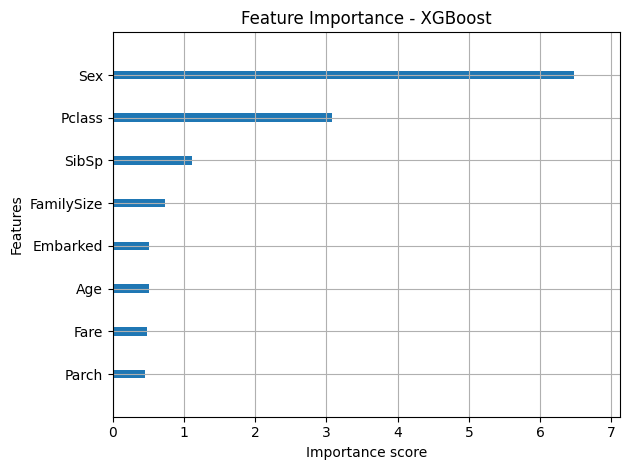

In [12]:
from xgboost import plot_importance
pd.DataFrame(metrics, index=['Random Forest','XGBoost'])
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)

plt.figure(figsize=(8,5))
plot_importance(xgb, importance_type='gain', max_num_features=len(X.columns), show_values=False)
plt.title('Feature Importance - XGBoost')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'XGBoost Feature Importance')

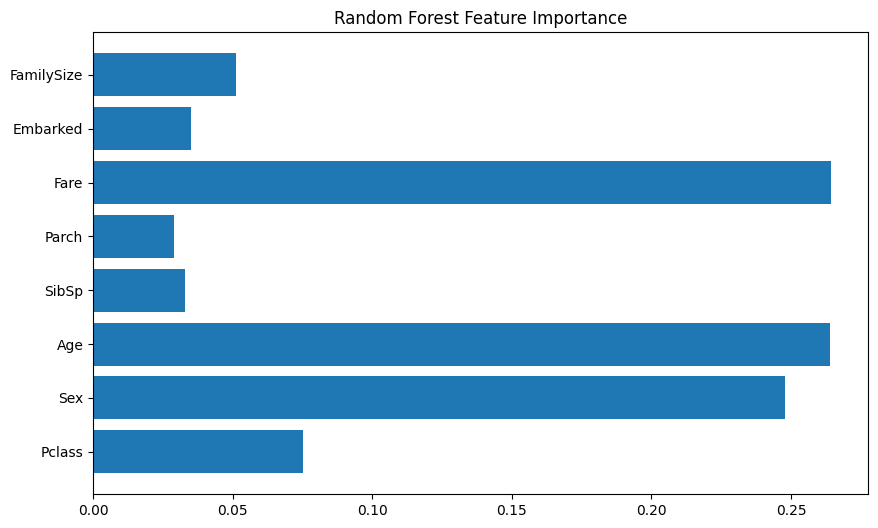

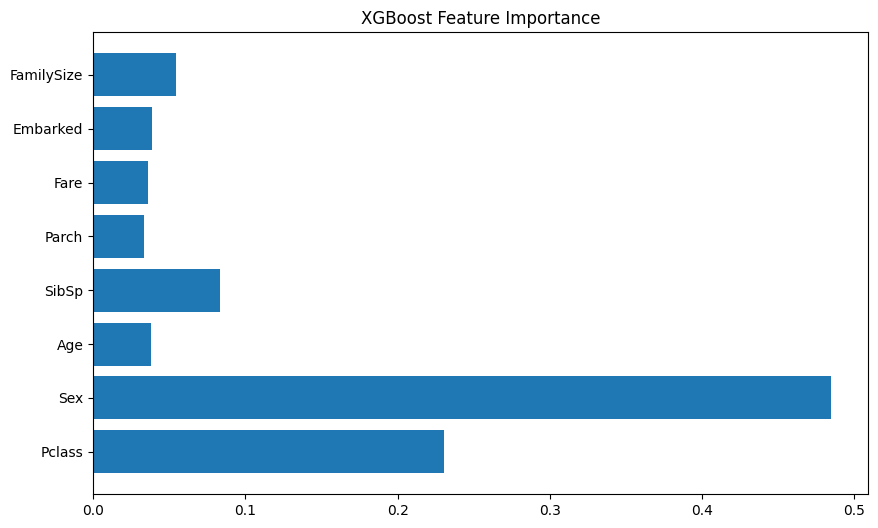

In [13]:
# Random Forest
plt.figure(figsize=(10,6))
plt.barh(X.columns, rf.feature_importances_)
plt.title('Random Forest Feature Importance')

# XGBoost
plt.figure(figsize=(10,6))
plt.barh(X.columns, xgb.feature_importances_)
plt.title('XGBoost Feature Importance')


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

grid = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")
grid.cv_results_

Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}


{'mean_fit_time': array([0.05216532, 0.09555173, 0.0751615 , 0.14389982, 0.10320878,
        0.19227643, 0.05198054, 0.09643445, 0.07829647, 0.14237504,
        0.1042367 , 0.18666015]),
 'std_fit_time': array([0.0015957 , 0.00055984, 0.00103216, 0.00181662, 0.00736238,
        0.00436817, 0.00095932, 0.00241526, 0.00662061, 0.00387052,
        0.0122559 , 0.00394534]),
 'mean_score_time': array([0.00318565, 0.00319676, 0.00319214, 0.0033216 , 0.00328255,
        0.00360022, 0.00325384, 0.00338378, 0.00326524, 0.00336099,
        0.00355968, 0.00347843]),
 'std_score_time': array([7.07669719e-05, 5.87581415e-05, 1.64348095e-04, 8.91939678e-05,
        8.05827992e-05, 2.59867441e-04, 1.98494119e-04, 2.68385904e-04,
        1.03127498e-04, 1.23989306e-04, 2.19455857e-04, 3.57445352e-05]),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1,
                    0.1, 0.1],
              mask=[False, False, False, False, False, False, False, Fal

In [15]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier())
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)
stack.fit(X_train, y_train)
stack_score = stack.score(X_test, y_test)
print(f"Stacking Classifier Accuracy: {stack_score:.4f}")

Stacking Classifier Accuracy: 0.8492


In [ ]:
import numpy as np

# Creating an example input using NumPy
input_example = np.array(X_test[:5])  # Adjust based on your data structure

# Logging the model with the input example
mlflow.sklearn.log_model(model, "model", input_example=input_example)


In [16]:
import mlflow
import mlflow.sklearn
from xgboost import XGBClassifier
# Bắt đầu ghi log với MLflow
with mlflow.start_run(run_name="Titanic XGB"):
    model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    # Log params & metric
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 3)
    mlflow.log_param("learning_rate", 0.1)
    mlflow.log_metric("accuracy", acc)
    # Log model
    mlflow.sklearn.log_model(model, "model")
    print(f"Accuracy: {acc}")

2025/05/09 09:46:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.8379888268156425
